In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
X = pd.read_csv('linearX.csv')
y = pd.read_csv('linearY.csv')

In [17]:
X = X.values.flatten()
y = y.values.flatten()

In [21]:
X_norm = (X - np.mean(X)) / np.std(X)
X_norm

array([-0.02980118,  0.60654168,  0.20159622, -0.66614404, -0.20334923,
        4.36674951, -0.43474664, -0.60829469, -0.49259599,  1.18503519,
        1.99492611, -0.55044534,  1.12718584,  0.49084298, -0.08765053,
       -1.41818561, -1.01324015, -0.78184275,  1.35858325,  0.25944558,
       -0.37689729, -1.01324015, -1.53388431,  0.49084298,  0.78008974,
       -0.31904794,  2.22632352, -0.14549988, -0.37689729,  1.58998065,
        1.24288455, -1.0710895 , -0.20334923,  3.26761184, -0.02980118,
       -0.78184275, -0.78184275, -0.60829469,  0.14374687, -0.37689729,
        1.06933649, -1.12893885, -0.60829469, -1.53388431,  1.5321313 ,
       -0.26119859,  0.49084298,  0.66439103, -0.8396921 , -0.49259599,
       -0.02980118, -0.14549988, -0.08765053, -0.60829469, -0.60829469,
       -0.26119859,  0.60654168,  0.54869233, -0.08765053, -0.8396921 ,
        2.22632352, -0.89754145, -0.55044534,  0.43299363, -0.31904794,
       -0.20334923, -1.1867882 ,  1.47428195, -0.8396921 ,  0.08

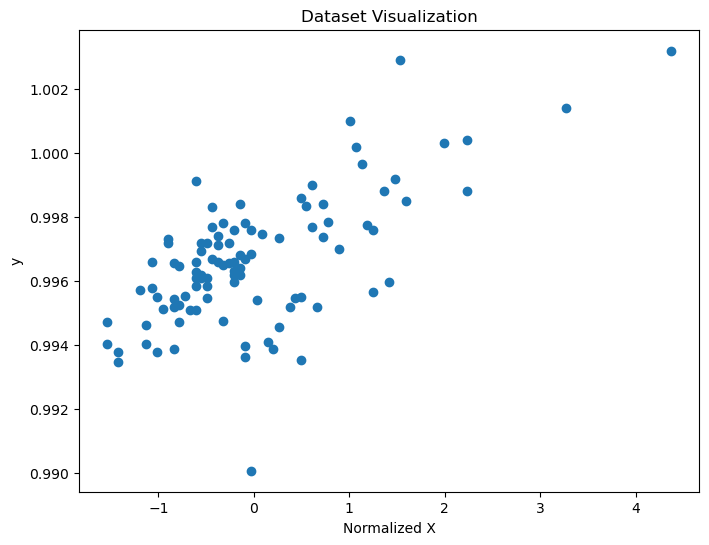

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_norm, y)
plt.xlabel('Normalized X')
plt.ylabel('y')
plt.title('Dataset Visualization')
plt.show()

In [41]:
learning_rate = 0.5
epochs = 1000
w = 0
b = 0
costs = []

In [42]:
m = len(X_norm)
for epoch in range(epochs):
    # Forward pass
    y_pred = w * X_norm + b
    
    # Compute gradients
    dw = np.sum((y_pred - y) * X_norm) / m
    db = np.sum(y_pred - y) / m
    
    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Compute cost
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    costs.append(cost)
    
    # Convergence check
    if epoch > 0 and abs(costs[epoch] - costs[epoch-1]) < 1e-8:
        break

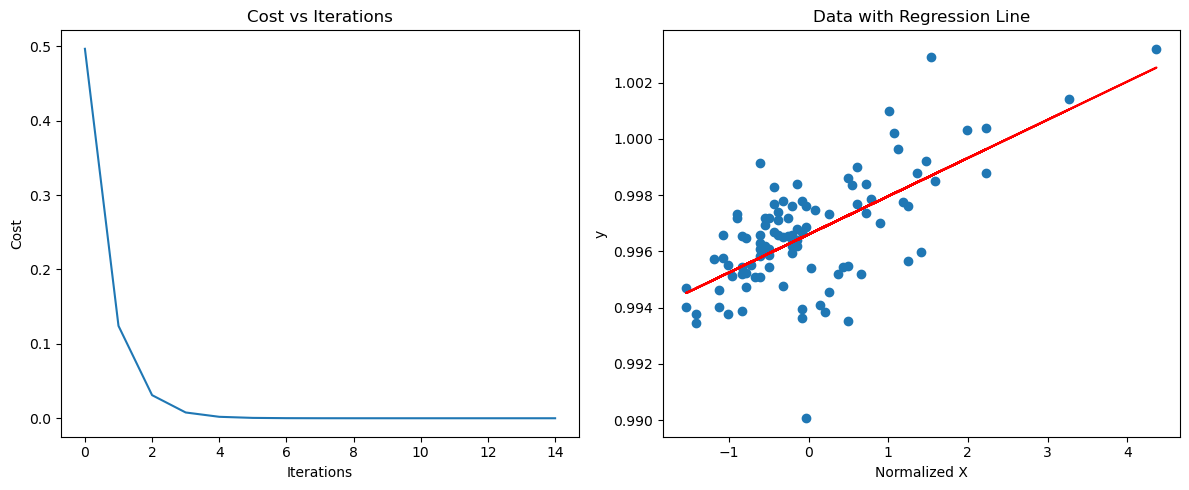

Final parameters: w = 0.0014, b = 0.9966
Final cost: 0.00000118


In [43]:
# Cell 4: Plotting results
plt.figure(figsize=(12, 5))

# Cost vs iterations
plt.subplot(1, 2, 1)
plt.plot(costs[:50])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

# Data with regression line
plt.subplot(1, 2, 2)
plt.scatter(X_norm, y)
plt.plot(X_norm, w * X_norm + b, 'r')
plt.xlabel('Normalized X')
plt.ylabel('y')
plt.title('Data with Regression Line')

plt.tight_layout()
plt.show()

print(f"Final parameters: w = {w:.4f}, b = {b:.4f}")
print(f"Final cost: {costs[-1]:.8f}")

C:\Users\linar\AppData\Local\Temp\ipykernel_17128\4150835332.py:20: RuntimeWarning: overflow encountered in square
  cost = np.sum((y_pred - y) ** 2) / (2 * m)
C:\Users\linar\AppData\Local\Temp\ipykernel_17128\4150835332.py:18: RuntimeWarning: invalid value encountered in scalar subtract
  b -= lr * db


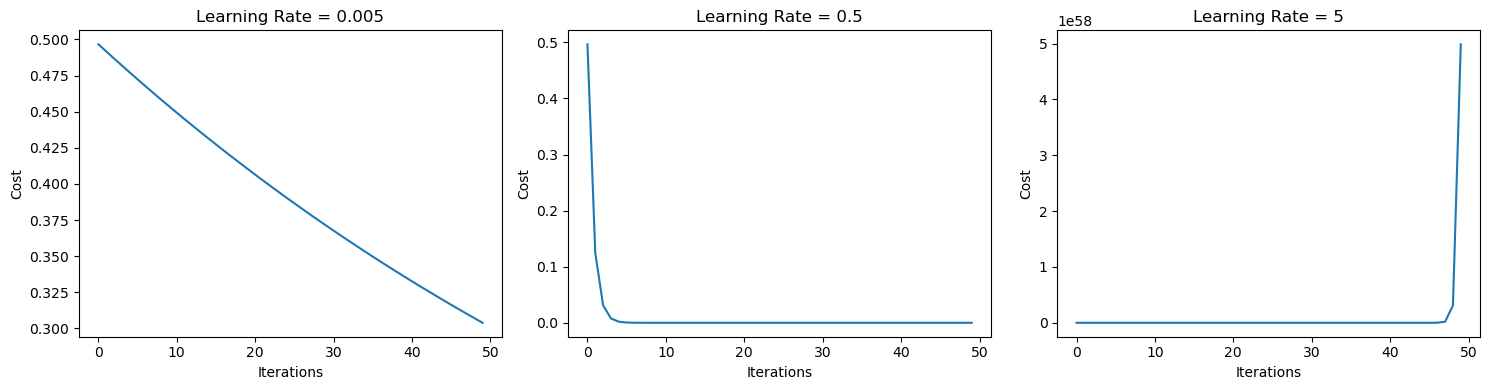

In [31]:
# Cell 1: Different learning rates comparison
learning_rates = [0.005, 0.5, 5]
plt.figure(figsize=(15, 4))

for i, lr in enumerate(learning_rates):
    # Initialize parameters
    w, b = 0, 0
    costs = []
    m = len(X_norm)
    
    # Training loop
    for epoch in range(1000):
        y_pred = w * X_norm + b
        dw = np.sum((y_pred - y) * X_norm) / m
        db = np.sum(y_pred - y) / m
        
        w -= lr * dw
        b -= lr * db
        
        cost = np.sum((y_pred - y) ** 2) / (2 * m)
        costs.append(cost)
    
    plt.subplot(1, 3, i+1)
    plt.plot(costs[:50])
    plt.title(f'Learning Rate = {lr}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

plt.tight_layout()
plt.show()

In [32]:
# Cell 2: Stochastic Gradient Descent
w, b = 0, 0
costs_sgd = []
m = len(X_norm)
indices = np.arange(m)

for epoch in range(1000):
    np.random.shuffle(indices)
    epoch_cost = 0
    
    for idx in indices:
        y_pred = w * X_norm[idx] + b
        dw = (y_pred - y[idx]) * X_norm[idx]
        db = y_pred - y[idx]
        
        w -= 0.5 * dw
        b -= 0.5 * db
        
    y_pred = w * X_norm + b
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    costs_sgd.append(cost)

In [33]:
# Cell 3: Mini-batch Gradient Descent
w, b = 0, 0
costs_mini = []
batch_size = 32

for epoch in range(1000):
    np.random.shuffle(indices)
    
    for i in range(0, m, batch_size):
        batch_idx = indices[i:min(i+batch_size, m)]
        X_batch = X_norm[batch_idx]
        y_batch = y[batch_idx]
        
        y_pred = w * X_batch + b
        dw = np.sum((y_pred - y_batch) * X_batch) / len(batch_idx)
        db = np.sum(y_pred - y_batch) / len(batch_idx)
        
        w -= 0.5 * dw
        b -= 0.5 * db
    
    y_pred = w * X_norm + b
    cost = np.sum((y_pred - y) ** 2) / (2 * m)
    costs_mini.append(cost)

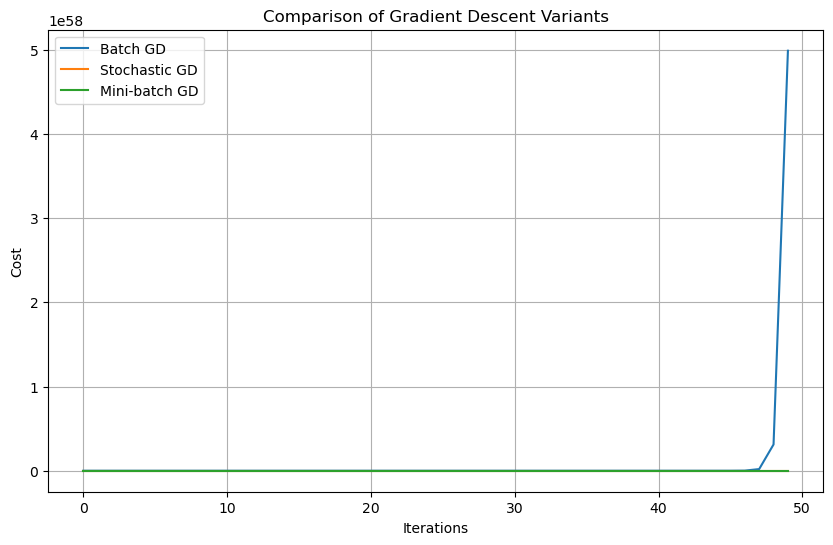

In [36]:
# Cell 4: Compare all methods
plt.figure(figsize=(10, 6))
plt.plot(costs[:50], label='Batch GD')
plt.plot(costs_sgd[:50], label='Stochastic GD')
plt.plot(costs_mini[:50], label='Mini-batch GD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Comparison of Gradient Descent Variants')
plt.legend()
plt.grid(True)
plt.show()